In [2]:
import requests
import pandas as pd
from io import StringIO

url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv"

try:
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers, timeout=30)
    resp.raise_for_status()

    df = pd.read_csv(StringIO(resp.text))
    print("Download & Parse: OK")

except requests.exceptions.Timeout as e:
    print(f"Error beim Runterladen (Timeout): {e}")
    df= pd.DataFrame()

except requests.exceptions.RequestException as e:
    print(f"Error während des Downloads: {e}")
    df = pd.DataFrame()

print("df.shape:", getattr(df, "shape", None))


Download & Parse: OK
df.shape: (1809775, 9)


In [3]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17


In [4]:
df["Retiro_Datetime"] = pd.to_datetime(df["Fecha_Retiro"] + " " + df["Hora_Retiro"], dayfirst=True)
df["Arribo_Datetime"] = pd.to_datetime(df["Fecha_Arribo"] + " " + df["Hora_Arribo"], dayfirst=True)

# Calculate trip duration
df["Duracion"] = df["Arribo_Datetime"] - df["Retiro_Datetime"]
df["Duracion_Min"] = df["Duracion"].dt.total_seconds() / 60



In [5]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Duracion,Duracion_Min
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,0 days 00:03:01,3.016667
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,0 days 00:09:01,9.016667
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,0 days 00:12:23,12.383333
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,0 days 00:06:57,6.950000
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,0 days 00:25:49,25.816667


In [6]:
df["Duracion_Min"].max()




1032524.9666666667

In [7]:
import numpy as np
import pandas as pd

bins   = [0, 20, 45, 60, np.inf]
labels = ['Viaje Corto', 'Viaje Mediano', 'Viaje Largo', 'Viaje Muy Largo (Anomalía)']

df['categoria_duracion'] = pd.cut(
    df['Duracion_Min'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

print("Columna 'categoria_duracion' creada.")
print("\nConteo de viajes por categoría de duración:")
print(df['categoria_duracion'].value_counts().reindex(labels, fill_value=0))

print("\nPrevisualización del DataFrame con la nueva columna:")
display(df.head())

Columna 'categoria_duracion' creada.

Conteo de viajes por categoría de duración:
categoria_duracion
Viaje Corto                   1364940
Viaje Mediano                  422074
Viaje Largo                     15733
Viaje Muy Largo (Anomalía)       7028
Name: count, dtype: int64

Previsualización del DataFrame con la nueva columna:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Duracion,Duracion_Min,categoria_duracion
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,0 days 00:03:01,3.016667,Viaje Corto
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,0 days 00:09:01,9.016667,Viaje Corto
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,0 days 00:12:23,12.383333,Viaje Corto
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,0 days 00:06:57,6.950000,Viaje Corto
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,0 days 00:25:49,25.816667,Viaje Mediano


In [14]:
filt = df["categoria_duracion"].isin(["Viaje Largo", "Viaje Muy Largo (Anomalía)"])
df_filtered = df.loc[filt]
df_filtered

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Duracion,Duracion_Min,categoria_duracion
46,M,41.0,3667193,016,31/12/2024,23:23:56,547,01/01/2025,00:12:53,2024-12-31 23:23:56,2025-01-01 00:12:53,0 days 00:48:57,48.950000,Viaje Largo
47,M,23.0,2514354,041,31/12/2024,23:25:52,685,01/01/2025,00:13:09,2024-12-31 23:25:52,2025-01-01 00:13:09,0 days 00:47:17,47.283333,Viaje Largo
67,M,40.0,6383285,384,31/12/2024,23:14:44,556,01/01/2025,00:16:22,2024-12-31 23:14:44,2025-01-01 00:16:22,0 days 01:01:38,61.633333,Viaje Muy Largo (Anomalía)
70,M,34.0,3247178,549,31/12/2024,23:24:05,115,01/01/2025,00:17:11,2024-12-31 23:24:05,2025-01-01 00:17:11,0 days 00:53:06,53.100000,Viaje Largo
74,F,26.0,4323523,555,31/12/2024,23:20:09,554,01/01/2025,00:17:50,2024-12-31 23:20:09,2025-01-01 00:17:50,0 days 00:57:41,57.683333,Viaje Largo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809509,M,36.0,7281421,103,31/01/2025,22:56:03,629,31/01/2025,23:44:55,2025-01-31 22:56:03,2025-01-31 23:44:55,0 days 00:48:52,48.866667,Viaje Largo
1809539,M,28.0,4718896,323,31/01/2025,22:37:05,611,31/01/2025,23:46:16,2025-01-31 22:37:05,2025-01-31 23:46:16,0 days 01:09:11,69.183333,Viaje Muy Largo (Anomalía)
1809637,M,26.0,2213866,098,31/01/2025,22:42:16,096,31/01/2025,23:52:14,2025-01-31 22:42:16,2025-01-31 23:52:14,0 days 01:09:58,69.966667,Viaje Muy Largo (Anomalía)
1809717,F,26.0,5421227,160,31/01/2025,23:09:13,195,31/01/2025,23:57:11,2025-01-31 23:09:13,2025-01-31 23:57:11,0 days 00:47:58,47.966667,Viaje Largo


In [15]:
df_muy_largo = df[df["categoria_duracion"] == "Viaje Muy Largo (Anomalía)"]

df_muy_largo

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro_Datetime,Arribo_Datetime,Duracion,Duracion_Min,categoria_duracion
67,M,40.0,6383285,384,31/12/2024,23:14:44,556,01/01/2025,00:16:22,2024-12-31 23:14:44,2025-01-01 00:16:22,0 days 01:01:38,61.633333,Viaje Muy Largo (Anomalía)
113,M,23.0,7205859,581,31/12/2024,23:06:04,581,01/01/2025,00:23:46,2024-12-31 23:06:04,2025-01-01 00:23:46,0 days 01:17:42,77.700000,Viaje Muy Largo (Anomalía)
274,F,31.0,3623840,253,31/12/2024,22:34:53,021,01/01/2025,00:46:20,2024-12-31 22:34:53,2025-01-01 00:46:20,0 days 02:11:27,131.450000,Viaje Muy Largo (Anomalía)
299,M,25.0,2710135,066,31/12/2024,23:27:30,066,01/01/2025,00:50:38,2024-12-31 23:27:30,2025-01-01 00:50:38,0 days 01:23:08,83.133333,Viaje Muy Largo (Anomalía)
300,M,59.0,7437734,066,31/12/2024,23:28:00,066,01/01/2025,00:51:00,2024-12-31 23:28:00,2025-01-01 00:51:00,0 days 01:23:00,83.000000,Viaje Muy Largo (Anomalía)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807880,F,24.0,4468047,017,31/01/2025,21:09:57,025,31/01/2025,22:33:49,2025-01-31 21:09:57,2025-01-31 22:33:49,0 days 01:23:52,83.866667,Viaje Muy Largo (Anomalía)
1808658,M,28.0,2990299,073,31/01/2025,21:55:43,073,31/01/2025,23:04:39,2025-01-31 21:55:43,2025-01-31 23:04:39,0 days 01:08:56,68.933333,Viaje Muy Largo (Anomalía)
1808879,M,38.0,7294002,425,31/01/2025,21:37:14,703,31/01/2025,23:13:57,2025-01-31 21:37:14,2025-01-31 23:13:57,0 days 01:36:43,96.716667,Viaje Muy Largo (Anomalía)
1809539,M,28.0,4718896,323,31/01/2025,22:37:05,611,31/01/2025,23:46:16,2025-01-31 22:37:05,2025-01-31 23:46:16,0 days 01:09:11,69.183333,Viaje Muy Largo (Anomalía)


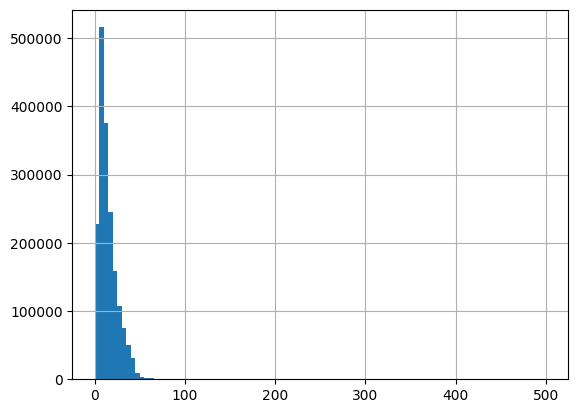

count    1.809775e+06
mean     1.593460e+01
std      7.927174e+02
min      3.166667e-01
50%      1.190000e+01
95%      3.611667e+01
99%      4.683333e+01
99.9%    1.037242e+02
max      1.032525e+06
Name: Duracion_Min, dtype: float64


In [16]:
import matplotlib.pyplot as plt
df["Duracion_Min"].hist(bins=100, range=(0,500))
plt.show()

print(df["Duracion_Min"].describe(percentiles=[0.95,0.99,0.999]))


In [17]:
df_filtered = df[df["Duracion_Min"] < 360]


In [18]:
import numpy as np
y = np.log1p(df_filtered["Duracion_Min"])


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


df["hour"] = df["Retiro_Datetime"].dt.hour
df["weekday"] = df["Retiro_Datetime"].dt.weekday

feature_cols = [
    "Edad_Usuario", "Genero_Usuario",
    "Ciclo_Estacion_Retiro", "Ciclo_EstacionArribo",
    "hour", "weekday"
]
target_col = "Duracion_Min"

X = df[feature_cols]
y = df[target_col]

mask = y.notna()
X, y = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

df_filtered = df.loc[
    (df["Duracion_Min"] > 0) &
    (df["Duracion_Min"] < df["Duracion_Min"].quantile(0.995))
].copy()

X = df_filtered[["Edad_Usuario", "Genero_Usuario",
                 "Ciclo_Estacion_Retiro", "Ciclo_EstacionArribo",
                 "hour", "weekday"]]
y = df_filtered["Duracion_Min"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

num_features  = ["Edad_Usuario", "hour", "weekday"]
cat_low       = ["Genero_Usuario"]
cat_high      = ["Ciclo_Estacion_Retiro", "Ciclo_EstacionArribo"]

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
])

cat_low_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh",  OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

cat_high_pipe = Pipeline([
    ("imp",  SimpleImputer(strategy="most_frequent")),
    ("ord",  OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

preproc = ColumnTransformer([
    ("num",      num_pipe,     num_features),
    ("cat_low",  cat_low_pipe, cat_low),
    ("cat_high", cat_high_pipe,cat_high),
])

gbr = HistGradientBoostingRegressor(random_state=42)

model = Pipeline([
    ("preprocessor", preproc),
    ("regressor", TransformedTargetRegressor(
        regressor=gbr,
        func=np.log1p,
        inverse_func=np.expm1
    )),
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} minutes")
print(f"MAE : {mae:.2f} minutes")
print(f"R²  : {r2:.4f}")

baseline = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)
rmse_b = np.sqrt(mean_squared_error(y_test, baseline))
mae_b  = mean_absolute_error(y_test, baseline)
print(f"Baseline (mean) RMSE: {rmse_b:.2f}, MAE: {mae_b:.2f}")



RMSE: 8.43 minutes
MAE : 5.74 minutes
R²  : 0.2743
Baseline (mean) RMSE: 9.90, MAE: 7.82
